#### 셀레니움 크롤링결과로 분석

##### 데이터 로드, 전처리

In [57]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

font_path = 'C:/Windows/Fonts/Hancom Gothic Bold.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False 

In [58]:
# 추가 라이브러리 임포트
import pandas as pd
import numpy as np

In [59]:
# 데이터로드
df = pd.read_excel('./1_crawling_jejudoHotplaces.xlsx')
df

,content,data,like,place,tags
0,arcco_iris_저희가 제주 공항 출발할때 가장 먼저 입었던 코디 !-은은하게 ...,2023-06-28,1306,NaN,[]
1,"beli._azagi._u(광고)애월에서 가성비 좋은 흑돼지 전문점을 찾는다면 ""애...",2023-06-29,0,애월읍 애월해안로 97,"['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ..."
2,osun_23오늘도 정시에 오픈했어용😊 정성 가득 담아 준비했어요🥰 식사하러 오세용...,2023-06-29,3,NaN,"['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두..."
3,luna.player여자들은 공감함 ㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━━━━━━━...,2023-06-27,825,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
4,nato.tving@@ 이렇게 자는 사람?? ㅋㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━...,2023-06-26,892,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
...,...,...,...,...,...
495,_astorstrans(광고)제주도에서 쓰끼다시가 가장 잘나오고 서귀포에서 오션뷰로...,2023-06-28,0,서귀포시 대포로 16111,"['#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도..."
496,hamdeok42안녕하세요 함사입니다 :)오늘은 하늘이 예뻐서 비행기 구경하러 스탭...,2023-06-28,31,NaN,"['#시로코', '#함덕사이게스트하우스-------------------------..."
497,leonila_waid2023(협찬) @cafe_the_light_jeju💗제주도에...,2023-06-28,1082,성산읍 한도로 269,"['#제주여행', '#제주카페', '#성산일출봉카페', '#제주카페추천', '#제주..."
498,_bi._ply_w__(리그램) @dotoree_jeju두둥 ! 맛집러들 다 모여📢...,2023-06-28,0,제주시 북성로 59,"['#제주공항근처맛집', '#제주공항근처맛집추천', '#제주맛집', '#제주맛집추천..."


In [60]:
# 중복제거 - content 컬럼 기준
# df.drop_duplicates(subset=['content'], inplace=True)
jeju_df = df.drop_duplicates(subset=['content'])

In [61]:
# 중복데이터 35개 삭제
jeju_df = jeju_df.reset_index(drop=True)
jeju_df

,content,data,like,place,tags
0,arcco_iris_저희가 제주 공항 출발할때 가장 먼저 입었던 코디 !-은은하게 ...,2023-06-28,1306,NaN,[]
1,"beli._azagi._u(광고)애월에서 가성비 좋은 흑돼지 전문점을 찾는다면 ""애...",2023-06-29,0,애월읍 애월해안로 97,"['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ..."
2,osun_23오늘도 정시에 오픈했어용😊 정성 가득 담아 준비했어요🥰 식사하러 오세용...,2023-06-29,3,NaN,"['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두..."
3,luna.player여자들은 공감함 ㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━━━━━━━...,2023-06-27,825,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
4,nato.tving@@ 이렇게 자는 사람?? ㅋㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━...,2023-06-26,892,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
...,...,...,...,...,...
460,_astorstrans(광고)제주도에서 쓰끼다시가 가장 잘나오고 서귀포에서 오션뷰로...,2023-06-28,0,서귀포시 대포로 16111,"['#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도..."
461,hamdeok42안녕하세요 함사입니다 :)오늘은 하늘이 예뻐서 비행기 구경하러 스탭...,2023-06-28,31,NaN,"['#시로코', '#함덕사이게스트하우스-------------------------..."
462,leonila_waid2023(협찬) @cafe_the_light_jeju💗제주도에...,2023-06-28,1082,성산읍 한도로 269,"['#제주여행', '#제주카페', '#성산일출봉카페', '#제주카페추천', '#제주..."
463,_bi._ply_w__(리그램) @dotoree_jeju두둥 ! 맛집러들 다 모여📢...,2023-06-28,0,제주시 북성로 59,"['#제주공항근처맛집', '#제주공항근처맛집추천', '#제주맛집', '#제주맛집추천..."


##### 전처리 중간

- tags, place로 dropna, 결측치제거 필요할수 있음
- 숫자로 통계를 내는 게 아니면 결측치제거는 옵션

##### 워드 클라우드

글자를 구름형태로 표현한 것

<img src='https://t1.daumcdn.net/cfile/tistory/99D89D3F5A4654AF13' width='500'>

In [62]:
del df

In [63]:
jeju_df['tags']

0                                                     []
1      ['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ...
2      ['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두...
3      ['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'...
4      ['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'...
                             ...                        
460    ['#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도...
461    ['#시로코', '#함덕사이게스트하우스-------------------------...
462    ['#제주여행', '#제주카페', '#성산일출봉카페', '#제주카페추천', '#제주...
463    ['#제주공항근처맛집', '#제주공항근처맛집추천', '#제주맛집', '#제주맛집추천...
464    ['#애월맛집', '#제주애월맛집', '#애월해안도로맛집', '#애월해안도로술집',...
Name: tags, Length: 465, dtype: object

In [64]:
# 해시태그 모으기
tags_total = []

for tags in jeju_df['tags']: # 하나하나가 리스트    
    tags_list = tags[2:-2].split("', '") # [2:-2] ==> [', '] 를 제거
    for tag in tags_list:
        if tag != '': # 빈태그 삭제
            if tag.find('\\u200b'): # 유니코드 space tag 삭제처리
                tags_total.append(tag.split('\\u200b')[0])
            else:
                tags_total.append(tag) 

len(tags_total)

6386

In [65]:
# 해시태그 출현빈도 집계
from collections import Counter
tags_counts = Counter(tags_total)

In [66]:
tags_counts.most_common(100)

[('#제주도맛집', 311),
 ('#제주맛집', 211),
 ('#애월맛집', 95),
 ('#제주여행', 94),
 ('#제주도', 94),
 ('#제주시맛집', 83),
 ('#제주도맛집추천', 73),
 ('#서귀포맛집', 71),
 ('#제주', 67),
 ('#제주가볼만한곳', 60),
 ('#제주도민맛집', 59),
 ('#제주공항근처맛집', 58),
 ('#제주카페', 57),
 ('#제주도여행', 57),
 ('#제주맛집추천', 54),
 ('#제주공항맛집', 51),
 ('#중문맛집', 51),
 ('#제주도카페', 49),
 ('#제주흑돼지맛집', 45),
 ('#제주흑돼지', 44),
 ('#제주중문맛집', 42),
 ('#제주도횟집', 42),
 ('#제주횟집', 42),
 ('#제주맛집투어', 39),
 ('#제주오션뷰맛집', 39),
 ('#서귀포맛집추천', 39),
 ('#서귀포횟집', 38),
 ('#중문횟집', 38),
 ('#애월해안도로맛집', 37),
 ('#제주여행코스', 36),
 ('#제주도흑돼지맛집', 35),
 ('#제주도흑돼지', 35),
 ('#한림맛집', 33),
 ('#애월가볼만한곳', 32),
 ('#곽지맛집', 31),
 ('#제주돈까스', 31),
 ('#곽지해수욕장맛집', 30),
 ('#협재흑돼지', 30),
 ('#제주카페추천', 29),
 ('#애월맛집추천', 29),
 ('#제주파스타', 29),
 ('#제주도맛집투어', 28),
 ('#새별오름', 28),
 ('#제주한림맛집', 27),
 ('#제주공항근처맛집추천', 25),
 ('#제주맛집탐방', 25),
 ('#제주도맛집베스트', 25),
 ('#제주시맛집추천', 25),
 ('#제주살이', 24),
 ('#한림흑돼지', 24),
 ('#한림흑돼지맛집', 24),
 ('#협재흑돼지맛집', 24),
 ('#제주해저', 24),
 ('#한림고기맛집', 24),
 ('#애월고기맛집', 24),
 ('#제주노을맛집', 24),
 ('#성산일출봉

##### 데이터 정제

해시태그 중 맛집과 관련없는 태그 삭제


In [67]:
delwords = ['#제주여행', '#제주도', '#제주', '#제주가볼만한곳', '#제주도여행', '#제주여행코스', '#애월가볼만한곳', '#새별오름', '#제주살이', '#제주해저',
            '#제주데이트', '#맞팔', '#제주도날씨', '#여행', '#제주일상', '#제주도가볼만한곳', '#제주도가족여행', '#jeju', '#아는형님게스트하우스',
            '#서울맛집' ]

total_tags = []
for tag in tags_total:
    if tag not in delwords:
        total_tags.append(tag)

total_tags_counts = Counter(total_tags)
total_tags_counts.most_common(71)

[('#제주도맛집', 311),
 ('#제주맛집', 211),
 ('#애월맛집', 95),
 ('#제주시맛집', 83),
 ('#제주도맛집추천', 73),
 ('#서귀포맛집', 71),
 ('#제주도민맛집', 59),
 ('#제주공항근처맛집', 58),
 ('#제주카페', 57),
 ('#제주맛집추천', 54),
 ('#제주공항맛집', 51),
 ('#중문맛집', 51),
 ('#제주도카페', 49),
 ('#제주흑돼지맛집', 45),
 ('#제주흑돼지', 44),
 ('#제주중문맛집', 42),
 ('#제주도횟집', 42),
 ('#제주횟집', 42),
 ('#제주맛집투어', 39),
 ('#제주오션뷰맛집', 39),
 ('#서귀포맛집추천', 39),
 ('#서귀포횟집', 38),
 ('#중문횟집', 38),
 ('#애월해안도로맛집', 37),
 ('#제주도흑돼지맛집', 35),
 ('#제주도흑돼지', 35),
 ('#한림맛집', 33),
 ('#곽지맛집', 31),
 ('#제주돈까스', 31),
 ('#곽지해수욕장맛집', 30),
 ('#협재흑돼지', 30),
 ('#제주카페추천', 29),
 ('#애월맛집추천', 29),
 ('#제주파스타', 29),
 ('#제주도맛집투어', 28),
 ('#제주한림맛집', 27),
 ('#제주공항근처맛집추천', 25),
 ('#제주맛집탐방', 25),
 ('#제주도맛집베스트', 25),
 ('#제주시맛집추천', 25),
 ('#한림흑돼지', 24),
 ('#한림흑돼지맛집', 24),
 ('#협재흑돼지맛집', 24),
 ('#한림고기맛집', 24),
 ('#애월고기맛집', 24),
 ('#제주노을맛집', 24),
 ('#성산일출봉카페', 23),
 ('#애월카페', 22),
 ('#맛집', 20),
 ('#제주애월맛집', 19),
 ('#제주핫플', 19),
 ('#성산맛집', 18),
 ('#성산카페', 16),
 ('#제주핫플레이스', 16),
 ('#먹팔', 16),
 ('#제주루프탑카페', 15),
 ('#제주서귀

In [68]:
# 막대차트 그리기 준비
tags_df = pd.DataFrame(total_tags_counts.most_common(71))
tags_df.columns = ['태그', '빈도수']
tags_df

,태그,빈도수
0,#제주도맛집,311
1,#제주맛집,211
2,#애월맛집,95
3,#제주시맛집,83
4,#제주도맛집추천,73
...,...,...
66,#서귀포카페,10
67,#산방산맛집,10
68,#제주도집밥,10
69,#제주아침식사,10


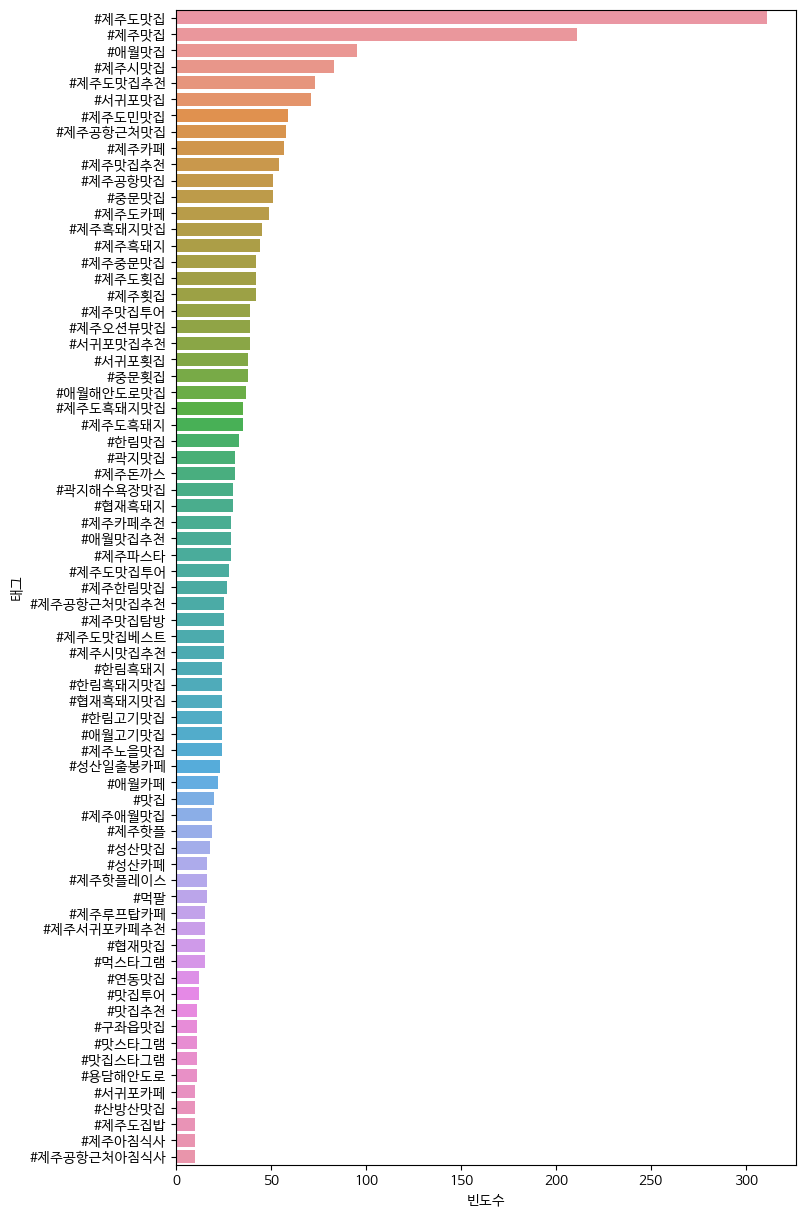

In [69]:
# 막대차트
plt.figure(figsize=(8, 15))
sns.barplot(x='빈도수', y='태그', data=tags_df)
plt.show()

##### 워드클라우드 

```python
!pip install wordcloud
```

In [70]:
!pip install wordcloud

In [71]:
dict(total_tags_counts.most_common(71))

{'#제주도맛집': 311,
 '#제주맛집': 211,
 '#애월맛집': 95,
 '#제주시맛집': 83,
 '#제주도맛집추천': 73,
 '#서귀포맛집': 71,
 '#제주도민맛집': 59,
 '#제주공항근처맛집': 58,
 '#제주카페': 57,
 '#제주맛집추천': 54,
 '#제주공항맛집': 51,
 '#중문맛집': 51,
 '#제주도카페': 49,
 '#제주흑돼지맛집': 45,
 '#제주흑돼지': 44,
 '#제주중문맛집': 42,
 '#제주도횟집': 42,
 '#제주횟집': 42,
 '#제주맛집투어': 39,
 '#제주오션뷰맛집': 39,
 '#서귀포맛집추천': 39,
 '#서귀포횟집': 38,
 '#중문횟집': 38,
 '#애월해안도로맛집': 37,
 '#제주도흑돼지맛집': 35,
 '#제주도흑돼지': 35,
 '#한림맛집': 33,
 '#곽지맛집': 31,
 '#제주돈까스': 31,
 '#곽지해수욕장맛집': 30,
 '#협재흑돼지': 30,
 '#제주카페추천': 29,
 '#애월맛집추천': 29,
 '#제주파스타': 29,
 '#제주도맛집투어': 28,
 '#제주한림맛집': 27,
 '#제주공항근처맛집추천': 25,
 '#제주맛집탐방': 25,
 '#제주도맛집베스트': 25,
 '#제주시맛집추천': 25,
 '#한림흑돼지': 24,
 '#한림흑돼지맛집': 24,
 '#협재흑돼지맛집': 24,
 '#한림고기맛집': 24,
 '#애월고기맛집': 24,
 '#제주노을맛집': 24,
 '#성산일출봉카페': 23,
 '#애월카페': 22,
 '#맛집': 20,
 '#제주애월맛집': 19,
 '#제주핫플': 19,
 '#성산맛집': 18,
 '#성산카페': 16,
 '#제주핫플레이스': 16,
 '#먹팔': 16,
 '#제주루프탑카페': 15,
 '#제주서귀포카페추천': 15,
 '#협재맛집': 15,
 '#먹스타그램': 15,
 '#연동맛집': 12,
 '#맛집투어': 12,
 '#맛집추천': 11,
 '#구좌읍맛집': 11,
 '#맛스타그램': 11,


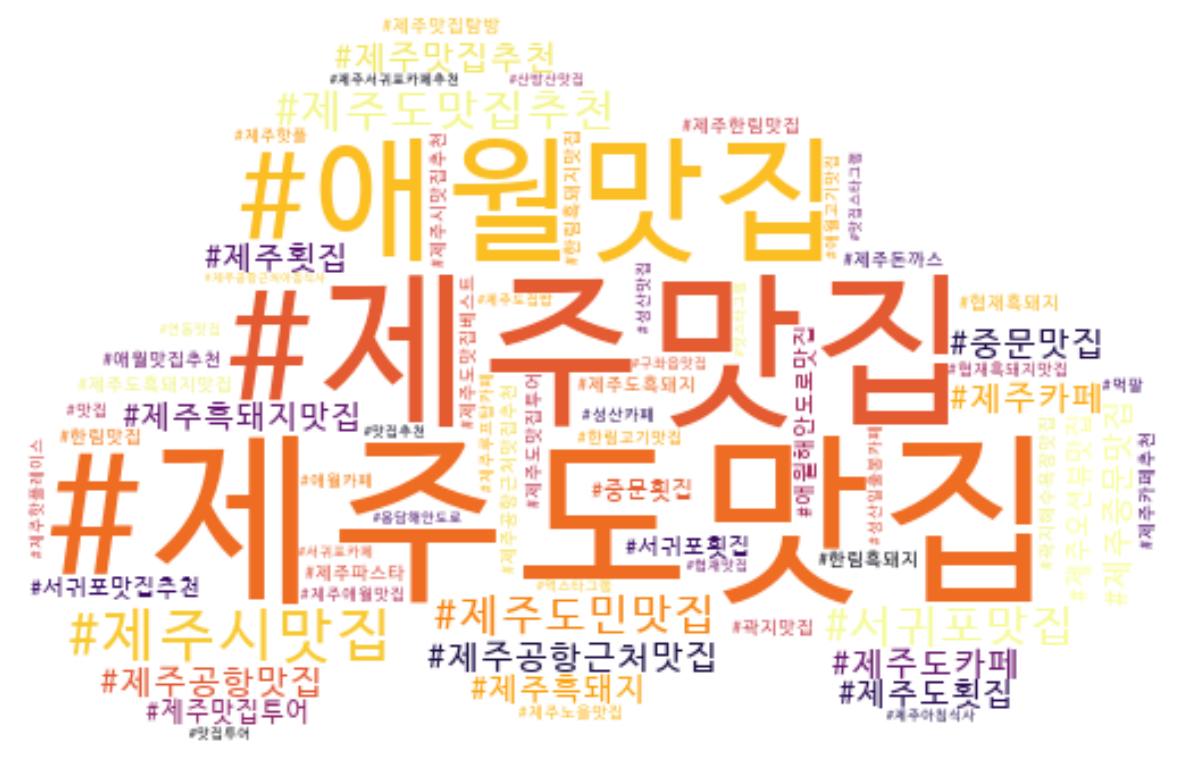

In [88]:
# 워드클라우드 한글 문제해결
from wordcloud import WordCloud
from PIL import Image, ImageOps

font_path = 'C:/Windows/Fonts/경'
tags_last = dict(total_tags_counts.most_common(71))

original_mask = np.array(Image.open('./cloud2.png'))
original_mask[original_mask.sum(axis=2) == 0] = 255

wc = WordCloud(mask=original_mask, font_path=font_path, colormap='inferno', background_color='white', max_words=100, relative_scaling=0.3,
               width=640, height=462).generate_from_frequencies(tags_last)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [92]:
mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [90]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [91]:
transformed_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [79]:
transformed_mask

array([[ 412509040,        601,  413553520, ...,  961308012, 1110914628,
         830108236],
       [1330793285,  728057927, 2053450545, ..., 1870289241, 1263233354,
         927883845],
       [1749760362, 1702186568, 1112296794, ..., 1733780560, 1785812597,
        1379166549],
       ...,
       [         0,          0,          0, ...,          0,          0,
                 0],
       [         0,          0,          0, ...,          0,          0,
                 0],
       [         0,          0,          0, ...,          0,          0,
                 0]])

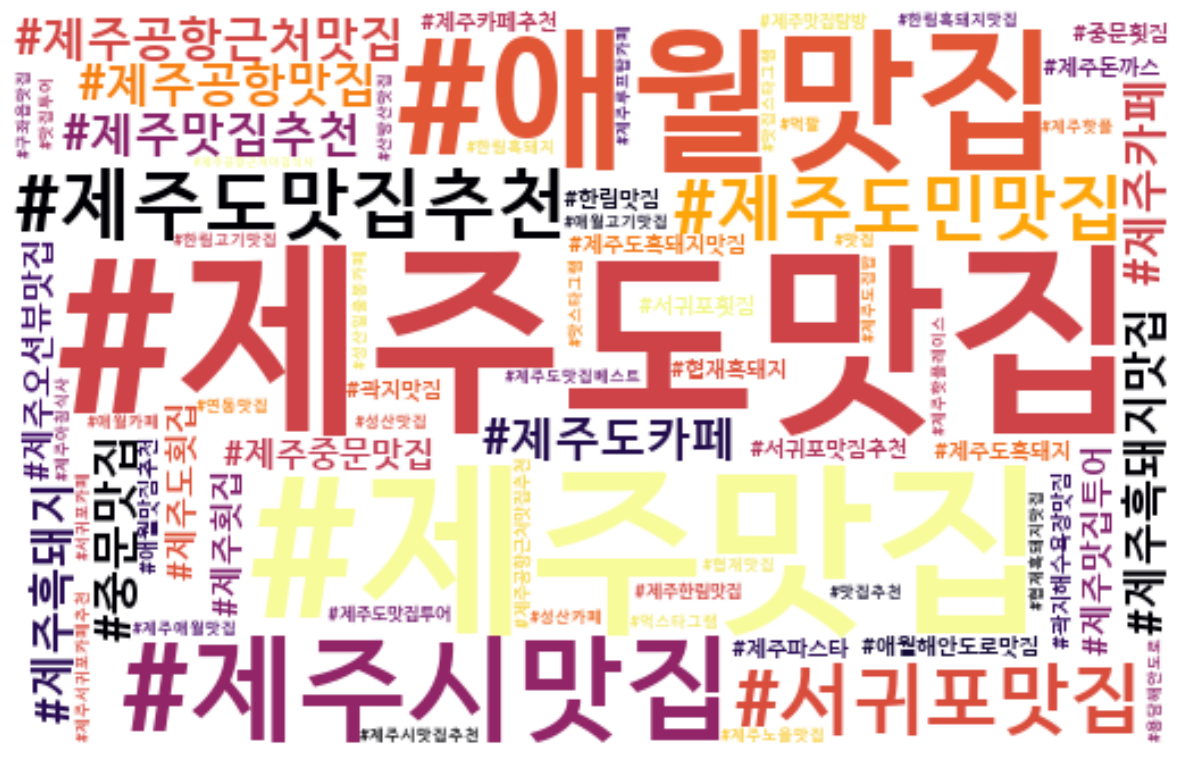

In [80]:
mask = np.array(Image.open('./cloud2.png'))
wc = WordCloud(mask=mask, font_path=font_path, colormap='inferno', background_color='white', max_words=100, relative_scaling=0.3,
               width=900, height=500).generate_from_frequencies(tags_last)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 지도 시각화
위치정보로 지도위에 위치 마킹

In [89]:
# 데이터 재로드
raw_total = pd.read_excel('./1_crawling_jejudoHotplaces.xlsx')
raw_total.head()

,content,data,like,place,tags
0,arcco_iris_저희가 제주 공항 출발할때 가장 먼저 입었던 코디 !-은은하게 ...,2023-06-28,1306,NaN,[]
1,"beli._azagi._u(광고)애월에서 가성비 좋은 흑돼지 전문점을 찾는다면 ""애...",2023-06-29,0,애월읍 애월해안로 97,"['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ..."
2,osun_23오늘도 정시에 오픈했어용😊 정성 가득 담아 준비했어요🥰 식사하러 오세용...,2023-06-29,3,NaN,"['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두..."
3,luna.player여자들은 공감함 ㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━━━━━━━...,2023-06-27,825,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
4,nato.tving@@ 이렇게 자는 사람?? ㅋㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━...,2023-06-26,892,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."


In [97]:
# 위치정보만 가져오기
temp = raw_total['place'] # temp 시리즈 생성
temp.rename(None, inplace=True)# 시리즈에서 place라는 이름은 삭제

temp.value_counts() # 확인

서귀포시 대포로 16111    39
대정읍 무릉사장로 154     33
애월읍 애월로 129       30
제주시 북성로 59        25
한립읍 귀덕리 4169-3    24
                  ..
성산읍 고성오조로 84-1     1
한림읍 한림로 339        1
제주시 서문로 6          1
애월읍 항파두리로 148      1
제주시 서문로 9-1        1
Name: count, Length: 62, dtype: int64

In [98]:
location_count_df = pd.DataFrame(temp.value_counts())
location_count_df

,count
서귀포시 대포로 16111,39
대정읍 무릉사장로 154,33
애월읍 애월로 129,30
제주시 북성로 59,25
한립읍 귀덕리 4169-3,24
...,...
성산읍 고성오조로 84-1,1
한림읍 한림로 339,1
제주시 서문로 6,1
애월읍 항파두리로 148,1


In [99]:
#위치 빈도값 저장
location_count_df.to_excel('./location_count.xlsx')

In [104]:
locations = list(location_count_df.index)
location_count_df[0] = '서귀도포 대포로 161' # 첫번쨰 주소의 16111 주소번호를 161로 변경

In [105]:
locations

['서귀포시 대포로 16111',
 '대정읍 무릉사장로 154',
 '애월읍 애월로 129',
 '제주시 북성로 59',
 '한립읍 귀덕리 4169-3',
 '성산읍 한도로 269',
 '제주시 용담로 16',
 '구좌읍 하도13길 25',
 '애월읍 하귀로 53',
 '서귀포시 이어도로 81',
 '애월읍 애월해안로 715',
 '제주시 탑동로 31-3',
 '위치제주시 중앙로 61',
 '애월읍 애월해안로 752',
 '서귀포시 중문관광로 321',
 '구좌읍 구좌해안로 35',
 '제주시 건주로 73',
 '제주시 우정로 22',
 '대정읍 신영로36번길41',
 '제주시 관덕로3길 9-1',
 '제주시 신대로16길 49',
 '애월읍 하광로 392',
 '애월읍 애월해안로 97',
 '애월읍 일주서로 7035',
 '애월읍 일주서로 6111',
 '제주시 청귤로 12',
 '제주시 동문로 10',
 '조천읍 조함해안로 504',
 '애월읍 애월해안로 384',
 '구좌읍 해맞이해안로 1112',
 '한림읍 문교길6',
 '서귀포시 1100로 171',
 '애월읍 애월로 11',
 '성산읍 오조로61번길 3-9',
 '제주시 관덕로 26',
 '애월읍 곽지9길 23',
 '감사합니다제주시 신대로20길46',
 '제주시 수덕로 9',
 '성산읍 동류암로 44',
 '한림읍 협재2길18',
 '제주시 관덕로15길 2',
 '애월읍 고내로7길 46-1',
 '제주시 서광로32길 29-1',
 '구좌읍 한동로 119',
 '조천읍 와흘상길 30',
 '성산읍 신풍리 627',
 '성산읍 환해장성로 467',
 '서귀포시 천제연로 315-30',
 '서귀포시 예래로 31',
 '구좌읍 해맞이해안로 2486-23',
 '애월읍 천덕로 880-24',
 '서귀포시 한창로 146',
 '제주시 흥운길 85',
 '서귀포시 중문관광로 72',
 '성산읍 해맞이해안로 2714',
 '제주시 아란서길 110',
 '서귀포시 예래해안로 195-1',
 '성산읍 고성오조로 84

#### 카카오 API사용 주소에 대한 위경도값, 추가정보 가져오기

In [117]:
import requests
from urllib import parse

def find_places(address):
    url = f'https://dapi.kakao.com/v2/local/search/address.json?query={parse.quote(address)}'
    hdr = {
        'Authorization': 'KakaoAK 9e13a6d13c7e2e0aca525da1dccbabff'
    }
    data = []
   
    places = requests.get(url, headers=hdr).json()['documents']
    places

    address_name = places[0]['address_name']
    lat = places[0]['y'] # 위도
    lng = places[0]['x'] # 경도
    bld_name = places[0]['road_address']['building_name'] # 빌딩이름

    data = [address_name, lat, lng, bld_name]

    return data


In [114]:
# 테스트
result = find_places('제주시 관덕로3길 9-1')
result

['제주특별자치도 제주시 관덕로3길 9-1', '33.5139398702552', '126.521176591559', '']

In [118]:
# 진행상태 표시하는 프로그래스바 모듈 tqdm
from tqdm.auto import tqdm
from time import sleep

location_infos = []
for loc in tqdm(locations):
    try:
        data = find_places(loc)
        location_infos.append(data)
        sleep(0.5)
    except:
        pass

ModuleNotFoundError: No module named 'tqdm'

In [119]:
location_infos

NameError: name 'location_infos' is not defined

In [ ]:
# 

In [ ]:
hopplace_df.to_excel('./hotplace_details.xlsx', index=False)

In [120]:
# 카운트 정보 머징
#hotplaces_df location_count_df
pd.merge(hopplaces_df, location_count_df, how='inner', left_on='기준주소', right_index=True)
last_data

NameError: name 'hopplaces_df' is not defined

In [ ]:
# 중복체크
last_data['검색주소'].value_counts()

In [121]:
last_data.pivot_table(index=['검색주소','위도','경도'],
                      value='count',
                      aggfunc='sum')

NameError: name 'last_data' is not defined

folium 모듈
!pip install folium

In [122]:
!pip install folium

                                              0.0/102.3 kB ? eta -:--:--
     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00
                                              0.0/133.1 kB ? eta -:--:--
     -------------------------------------- 133.1/133.1 kB 8.2 MB/s eta 0:00:00


In [127]:
# 지도 표시
import folium

center_loc = [33.362500, 126.5336934]
map_jeju = folium.Map(location=center_loc, zoom_start=15) # 1~15사이 1(지구본) 15(줌인)
map_jeju

In [ ]:
last_data.reset_index(drop=True, inplace=True)
last_data.loc[0]['주소검색']

In [126]:
center_loc = [33.362500,126.533694]
map_jeju = folium.Map(location=center_loc, zoom_start=11)

for i in range(len(last_data)):
    addr_name = last_data[i]['검색주소']
    count = last_data.loc[i]['count']
    size = int(count) * 2
    lat = float(last_data.loc[i]['위도'])
    lng = float(last_data.loc[i]['검토'])
    print(addr_name, count, size, lat, lng)
    # 지도상에 원을 그림
    popup = folium.Popup(addr_name, min_width=200, max_width=250)
    folium.CircleMaker((lat, lng), radius=size, color='red', popup=addr_name).add_to(map_jeju)

map_jeju

NameError: name 'last_data' is not defined

In [ ]:
from folium.plugins import MarkerCluster

locs = []
names = []

for i in range(len(last_data)):
    ldata = last_data.iloc[i] # 행을 하나씩
    locs.append((float(last_data.loc[i]['위도']),float(last_data.loc[i]['경도']))) #위도 경도 순으로
    names.append(ldata['검색주소'])


center_loc = [33.362500,126.533694]
map_jeju = folium.Map(location=center_loc, zoom_start=11)

marker_cluster = MarkerCluster(location=locs, popup)